In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.shape

(19158, 13)

## Check for Null values 

In [8]:
(df.isnull().mean())*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

### Here In this method we only remove those col that have missing value % less or equal to 5%
#### if we perform this on whole df than we may loss huge amount of the data so we need to avoid in that case 
### If we perform this, our model will not be in a conditon to deal with the missing data 

In [13]:
### enrollee id don't have any null value
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

### here we take those columns which have 5% values as null 
#### We use > 0 bcs a col without any null value will have a mean of 0 so we don't need to consider 

In [15]:
cols = [col for col in df.columns if df[col].isnull().mean() < 0.05 and df[col].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

### Let's Create a new data frame that consist of columns have 5% null value 

In [16]:
df1 = df[cols]
df1.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


## Here we got 5 cols
- 3 numerical values 
- 2 categorical cols


## Check the distribution of categorical variables 

In [17]:
df1['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

### Let's check how much data will be left if we drop rows

## We almost losing 11% of the data 

In [19]:
len(df1.dropna())/len(df1)

0.8968577095730244

### Drop and create new df

In [20]:
final_df = df1.dropna()
final_df.shape

(17182, 5)

In [21]:
## Shape of df1 before droping
df1.shape

(19158, 5)

## After Applying we need to make sure that the distribution of data remains same 
### Let's plot the graph
- For categorical data, plot hist graph

## First draw individual graph and after that compare distribution after and before the CCA

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

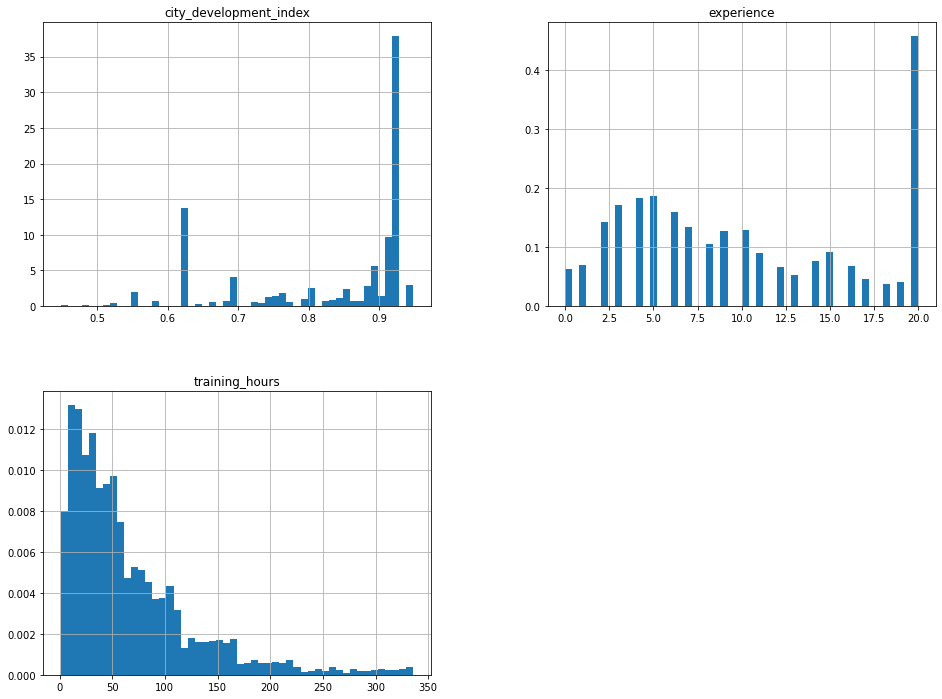

In [24]:
final_df.hist(bins=50 , density = True, figsize=(16,12))

### Before and after analysis of each column

(array([ 922., 1521., 1498., 1240., 1360., 1053., 1072., 1120.,  859.,
         543.,  608.,  592.,  523.,  426.,  432.,  501.,  364.,  151.,
         205.,  182.,  185.,  191.,  194.,  181.,  204.,   60.,   65.,
          85.,   67.,   69.,   73.,   68.,   81.,   42.,   15.,   23.,
          32.,   20.,   43.,   29.,   10.,   34.,   22.,   24.,   27.,
          33.,   29.,   28.,   34.,   42.]),
 array([  1. ,   7.7,  14.4,  21.1,  27.8,  34.5,  41.2,  47.9,  54.6,
         61.3,  68. ,  74.7,  81.4,  88.1,  94.8, 101.5, 108.2, 114.9,
        121.6, 128.3, 135. , 141.7, 148.4, 155.1, 161.8, 168.5, 175.2,
        181.9, 188.6, 195.3, 202. , 208.7, 215.4, 222.1, 228.8, 235.5,
        242.2, 248.9, 255.6, 262.3, 269. , 275.7, 282.4, 289.1, 295.8,
        302.5, 309.2, 315.9, 322.6, 329.3, 336. ]),
 <BarContainer object of 50 artists>)

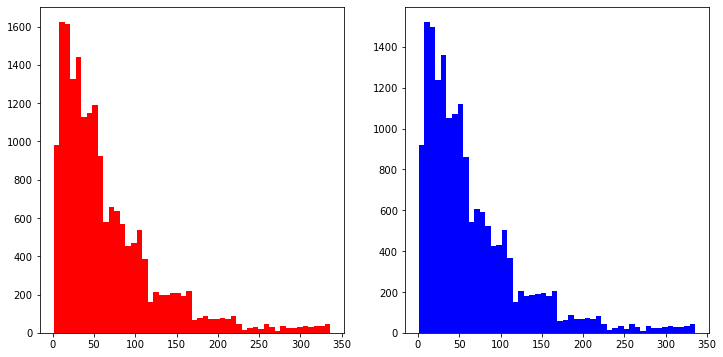

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(df1['training_hours'], bins=50 , color='red')

plt.subplot(122)
plt.hist(final_df['training_hours'], bins=50 , color='blue')

### Let's draw overlap plots 

(array([ 922., 1521., 1498., 1240., 1360., 1053., 1072., 1120.,  859.,
         543.,  608.,  592.,  523.,  426.,  432.,  501.,  364.,  151.,
         205.,  182.,  185.,  191.,  194.,  181.,  204.,   60.,   65.,
          85.,   67.,   69.,   73.,   68.,   81.,   42.,   15.,   23.,
          32.,   20.,   43.,   29.,   10.,   34.,   22.,   24.,   27.,
          33.,   29.,   28.,   34.,   42.]),
 array([  1. ,   7.7,  14.4,  21.1,  27.8,  34.5,  41.2,  47.9,  54.6,
         61.3,  68. ,  74.7,  81.4,  88.1,  94.8, 101.5, 108.2, 114.9,
        121.6, 128.3, 135. , 141.7, 148.4, 155.1, 161.8, 168.5, 175.2,
        181.9, 188.6, 195.3, 202. , 208.7, 215.4, 222.1, 228.8, 235.5,
        242.2, 248.9, 255.6, 262.3, 269. , 275.7, 282.4, 289.1, 295.8,
        302.5, 309.2, 315.9, 322.6, 329.3, 336. ]),
 <BarContainer object of 50 artists>)

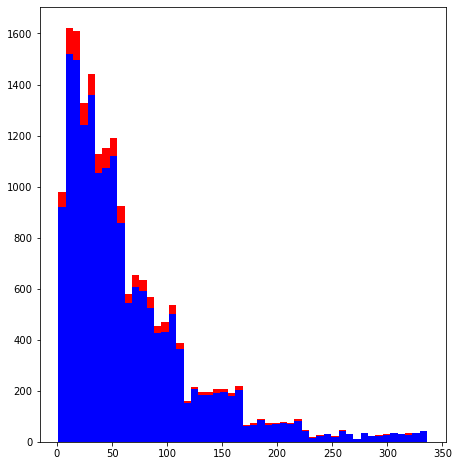

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.hist(df1['training_hours'], bins=50 , color='red')

#.subplot(122)
plt.hist(final_df['training_hours'], bins=50 , color='blue')

(array([1.600e+01, 0.000e+00, 0.000e+00, 1.900e+01, 1.300e+01, 0.000e+00,
        2.200e+01, 8.300e+01, 0.000e+00, 0.000e+00, 3.510e+02, 9.000e+00,
        0.000e+00, 1.130e+02, 0.000e+00, 0.000e+00, 0.000e+00, 2.369e+03,
        0.000e+00, 4.300e+01, 3.000e+00, 1.010e+02, 0.000e+00, 1.150e+02,
        6.950e+02, 8.000e+00, 0.000e+00, 8.900e+01, 8.300e+01, 2.160e+02,
        2.540e+02, 3.150e+02, 1.060e+02, 1.400e+01, 1.760e+02, 4.270e+02,
        0.000e+00, 1.250e+02, 1.400e+02, 1.880e+02, 4.180e+02, 1.180e+02,
        1.330e+02, 4.970e+02, 9.780e+02, 2.430e+02, 1.661e+03, 6.524e+03,
        0.000e+00, 5.170e+02]),
 array([0.448  , 0.45802, 0.46804, 0.47806, 0.48808, 0.4981 , 0.50812,
        0.51814, 0.52816, 0.53818, 0.5482 , 0.55822, 0.56824, 0.57826,
        0.58828, 0.5983 , 0.60832, 0.61834, 0.62836, 0.63838, 0.6484 ,
        0.65842, 0.66844, 0.67846, 0.68848, 0.6985 , 0.70852, 0.71854,
        0.72856, 0.73858, 0.7486 , 0.75862, 0.76864, 0.77866, 0.78868,
        0.7987 , 0.80

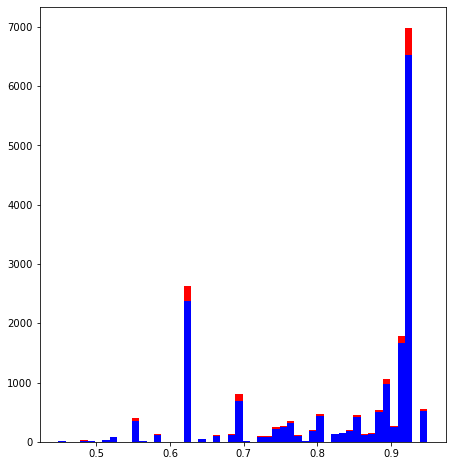

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.hist(df1['city_development_index'], bins=50 , color='red')

#.subplot(122)
plt.hist(final_df['city_development_index'], bins=50 , color='blue')

<AxesSubplot:ylabel='Density'>

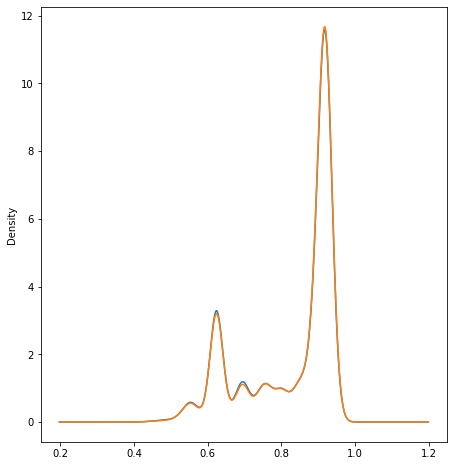

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(121)
df1['city_development_index'].plot.density()

#.subplot(122)
final_df['city_development_index'].plot.density()